In [1]:
import pickle
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from gensim.models.nmf import Nmf
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define the path to the pickle file
pickle_file = '/content/drive/MyDrive/RDS/RDSY2S3/BMCS2123-NATURAL LANGUAGE PROCESSING/Assignment/processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    df = pickle.load(file)

In [ ]:
# Define the path to the pickle file
pickle_file = 'processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    df = pickle.load(file)

In [4]:
# Define the path to the pickle file
pickle_file = '/content/drive/MyDrive/RDS/RDSY2S3/BMCS2123-NATURAL LANGUAGE PROCESSING/Assignment/test_processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    test_data = pickle.load(file)

In [ ]:
# Define the path to the pickle file
pickle_file = 'test_processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    test_data = pickle.load(file)

In [5]:
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,TITLE_len,ABSTRACT_len,title,abstract
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,4,265,"[reconstruct, effect, map]","[predictive, model, allow, inference, analyze,..."
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,4,76,"[rotation, invariance, neural, network]","[rotation, invariance, translation, invariance..."
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,8,99,"[spherical, polyharmonics, poisson, kernels, p...","[introduce, develop, notion, spherical, polyha..."
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,9,110,"[finite, element, approximation, stochastic, m...","[stochastic, landau, lifshitz, gilbert, llg, e..."
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,20,125,"[comparative, study, discrete, wavelet, transf...","[ftir, spectra, sample, 7, plant, species, use..."


In [6]:
df2 = df[['title', 'abstract']]
df2.head()

,title,abstract
0,"[reconstruct, effect, map]","[predictive, model, allow, inference, analyze,..."
1,"[rotation, invariance, neural, network]","[rotation, invariance, translation, invariance..."
2,"[spherical, polyharmonics, poisson, kernels, p...","[introduce, develop, notion, spherical, polyha..."
3,"[finite, element, approximation, stochastic, m...","[stochastic, landau, lifshitz, gilbert, llg, e..."
4,"[comparative, study, discrete, wavelet, transf...","[ftir, spectra, sample, 7, plant, species, use..."


In [7]:
# Convert the text column to a list of lists of tokens
documents = df2['abstract'].tolist()

# Create a dictionary and bag-of-words corpus using Gensim
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

In [8]:
abstract = df2['abstract']

#### Method 1: Range-Based Coherence Score Calculation with NMF
The highest coherence score is with 12 topics, but the elbow point is at 10. It means that while adding more topics may slightly improve the score, it might not make a big difference in how well the topics represent your data. So, 10 topics might be a good balance between simplicity and performance.

Since maximizing the coherence score is the main goal and can accommodate more complex models, the point with the highest coherence score is chosen.

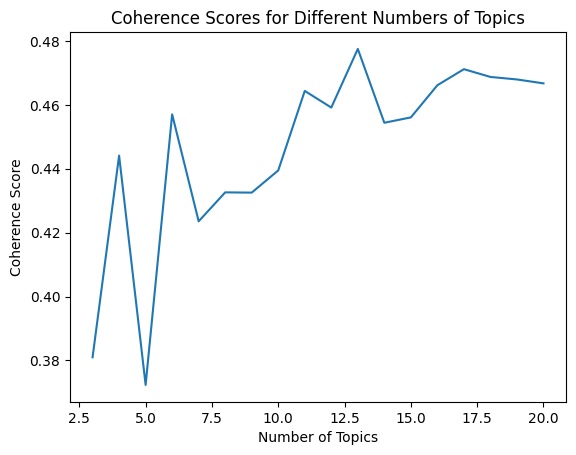

Elbow point (potential optimal number of topics): 5


In [9]:
# Calculate coherence scores for different numbers of topics
min_topics = 3
max_topics = 20  # set a reasonably high value

coherence_values = []

for num_topics in range(min_topics, max_topics + 1):
    nmf_model = Nmf(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    # Generate topic coherence scores (not inherent in NMF, so using LDA coherence calculation method)
    coherence_model = CoherenceModel(model=nmf_model, texts=abstract, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

# Plot coherence scores
x = range(min_topics, max_topics + 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.show()

# Find the elbow point
differences = np.diff(coherence_values)
elbow_point = np.argmax(differences) + min_topics

print(f"Elbow point (potential optimal number of topics): {elbow_point}")


#### Method 2: Grid Search with Coherence Score Calculation using NMF

Training NMF model with 5 topics...
Coherence score for 5 topics: 0.4051767894559276
Training NMF model with 10 topics...
Coherence score for 10 topics: 0.4070715189201284
Training NMF model with 15 topics...
Coherence score for 15 topics: 0.418911207258123
Training NMF model with 20 topics...
Coherence score for 20 topics: 0.40175907500436947


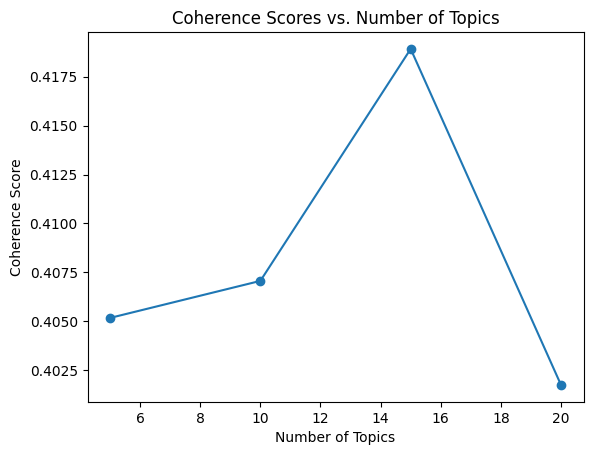

In [10]:
# Define the range of topic numbers to try
topic_nums = list(np.arange(5, 20 + 1, 5))
coherence_scores = []

# Iterate over different numbers of topics
for num in topic_nums:
    print(f"Training NMF model with {num} topics...")
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        random_state=24  # Setting a random seed for reproducibility
    )

    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=documents,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_score = cm.get_coherence()
    coherence_scores.append(round(coherence_score, 5))

    print(f"Coherence score for {num} topics: {coherence_score}")

# Plot coherence scores
plt.plot(topic_nums, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores vs. Number of Topics")
plt.show()

#### Decision for using which method result of optimal number of topics
Consider the trade-off between model complexity and performance. Method 2, which offers a more comprehensive analysis using grid search, it benefits from a thorough examination of coherence scores across a specified range of topic numbers. This method enables for fine-tuning and optimisation of the topic model by systematically assessing coherence scores for each number of topics. While Method 2 requires more computational resources and time than Method 1, it provides a more in-depth analysis of model performance and may lead to the discovery of the optimal number of subjects for maximum coherence and relevance. Furthermore, the granularity afforded by Method 2 allows for better informed decisions regarding the trade-offs between model complexity and performance, it is resulting in a more refined and effective topic model.

### Model Training

In [11]:
# Train an NMF model with the optimal number of topics
optimal_num_topics = 15
nmf_model = Nmf(corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=10)

### Topic Interpretation

In [12]:
# Get the top words for each topic
topics = nmf_model.show_topics(num_topics=optimal_num_topics, num_words=10)

# Print the top words for each topic
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")

Topic 0: 0.069*"n" + 0.042*"k" + 0.025*"x" + 0.023*"g" + 0.022*"p" + 0.022*"1" + 0.021*"f" + 0.014*"r" + 0.014*"2" + 0.014*"number"
Topic 1: 0.155*"model" + 0.007*"propose" + 0.006*"parameters" + 0.006*"process" + 0.005*"inference" + 0.005*"train" + 0.004*"show" + 0.004*"bayesian" + 0.004*"prediction" + 0.004*"two"
Topic 2: 0.075*"function" + 0.012*"approach" + 0.011*"process" + 0.010*"propose" + 0.008*"optimization" + 0.007*"paper" + 0.007*"base" + 0.007*"new" + 0.006*"result" + 0.006*"show"
Topic 3: 0.127*"data" + 0.011*"analysis" + 0.008*"set" + 0.006*"train" + 0.005*"process" + 0.005*"methods" + 0.005*"provide" + 0.005*"approach" + 0.005*"information" + 0.004*"cluster"
Topic 4: 0.028*"system" + 0.018*"systems" + 0.012*"use" + 0.009*"control" + 0.008*"design" + 0.008*"paper" + 0.006*"present" + 0.006*"provide" + 0.005*"performance" + 0.005*"process"
Topic 5: 0.039*"group" + 0.034*"result" + 0.013*"study" + 0.012*"show" + 0.009*"g" + 0.008*"also" + 0.007*"prove" + 0.007*"case" + 0.00

### Topic Visualization

In [19]:
# Filter out noise data from topics
def filter_topics(nmf_model, num_words=10, min_word_length=2):
    filtered_topics = []
    for topic_id in range(nmf_model.num_topics):
        top_words = nmf_model.show_topic(topic_id, topn=num_words)
        filtered_words = [word for word, _ in top_words if len(word) > min_word_length]
        filtered_topics.append(filtered_words)
    return filtered_topics

# Filter topics for NMF model with 10 topics
filtered_topics = filter_topics(nmf_model, num_words=10, min_word_length=2)
print(filtered_topics)

[['number'], ['model', 'propose', 'parameters', 'process', 'inference', 'train', 'show', 'bayesian', 'prediction', 'two'], ['function', 'approach', 'process', 'propose', 'optimization', 'paper', 'base', 'new', 'result', 'show'], ['data', 'analysis', 'set', 'train', 'process', 'methods', 'provide', 'approach', 'information', 'cluster'], ['system', 'systems', 'use', 'control', 'design', 'paper', 'present', 'provide', 'performance', 'process'], ['group', 'result', 'study', 'show', 'also', 'prove', 'case', 'space', 'give'], ['time', 'structure', 'find', 'two', 'process', 'series', 'scale', 'star', 'study', 'mass'], ['sample', 'distribution', 'cluster', 'star', 'mass', 'find', 'galaxies', 'estimate', 'show', 'test'], ['set', 'problem', 'give', 'show', 'space', 'point', 'condition', 'consider', 'problems', 'case'], ['method', 'image', 'propose', 'methods', 'base', 'result', 'use', 'paper', 'test', 'new'], ['use', 'approach', 'feature', 'learn', 'present', 'base', 'train', 'show', 'different'

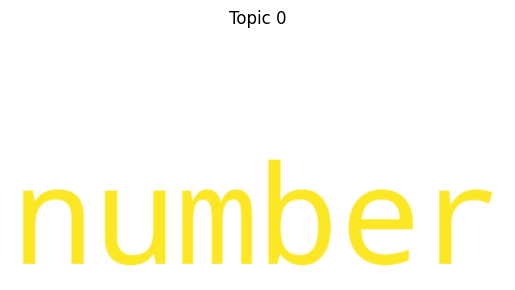

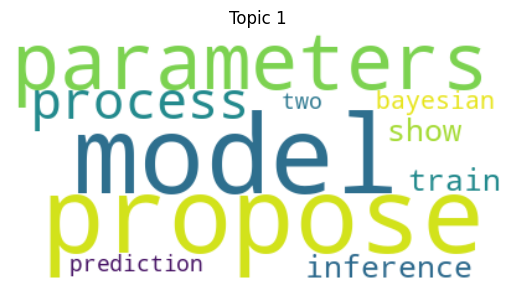

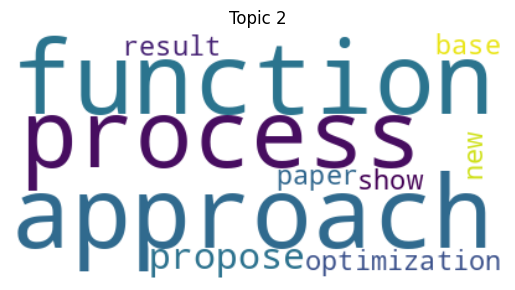

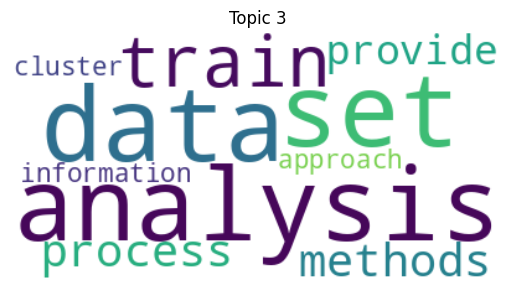

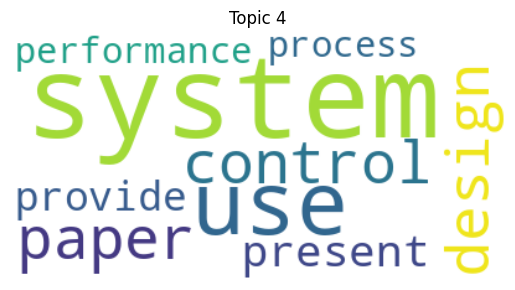

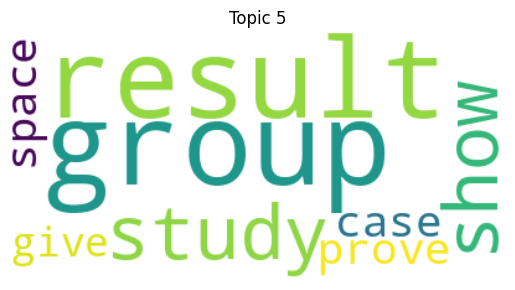

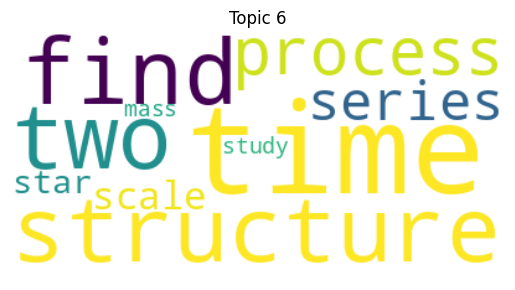

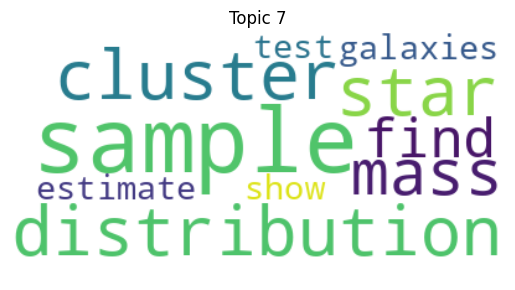

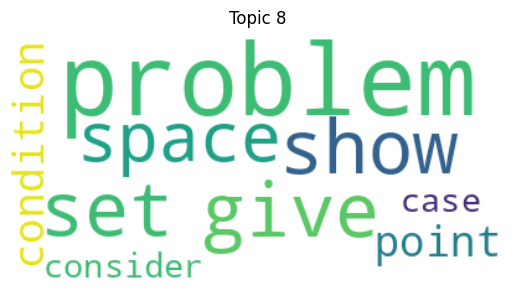

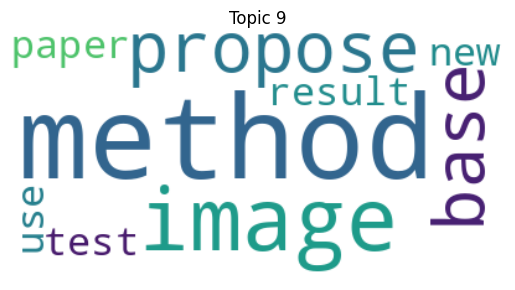

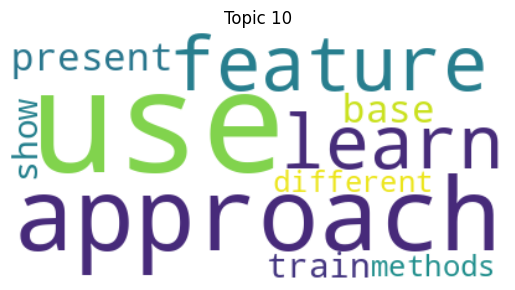

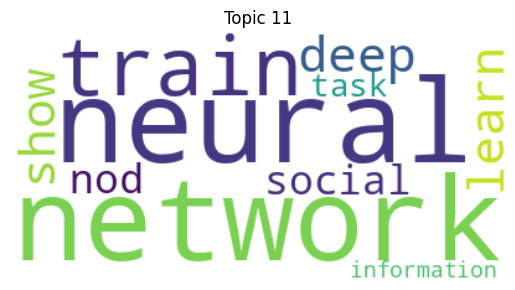

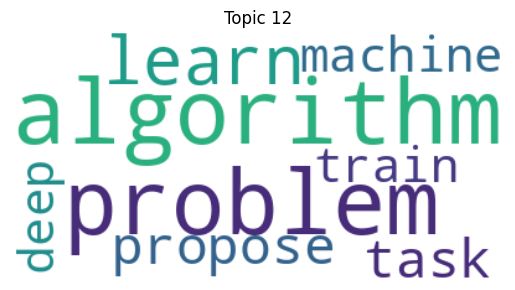

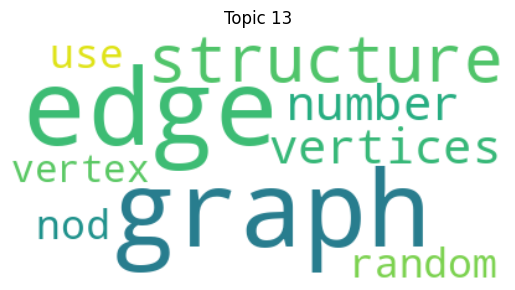

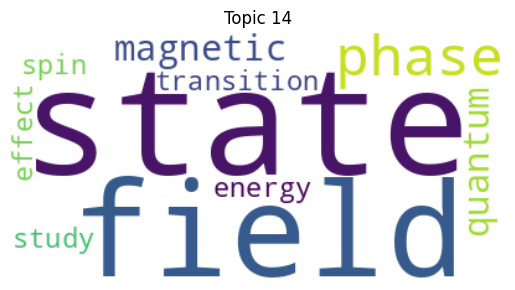

In [20]:
# Visualize topics with word clouds
def visualize_topics(filtered_topics):
    for topic_id, words in enumerate(filtered_topics):
        wordcloud = WordCloud(background_color='white').generate(' '.join(words))
        plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_id}')
        plt.axis('off')
        plt.show()

# Visualize filtered topics with word clouds
visualize_topics(filtered_topics)


### Documentation Topic Distribution

In [21]:
# Get the document-topic distribution
doc_topic_dist = [nmf_model[doc] for doc in corpus]

# Topic distribution for the first document
print(f"Document 0 topic distribution: {doc_topic_dist[0]}")


Document 0 topic distribution: [(1, 0.13425977846779005), (3, 0.24636718580543066), (5, 0.018670212728719077), (7, 0.10779703519618405), (8, 0.0459263433560504), (9, 0.11663407150544271), (10, 0.27935517536948606), (14, 0.050990197570897004)]


In [22]:
# Print the document-topic distribution in a structured format
def print_doc_topic_distribution(doc_topic_dist):
    for doc_id, topic_dist in enumerate(doc_topic_dist):
        print(f"Document {doc_id} topic distribution:")
        for topic_id, topic_prob in topic_dist:
            print(f"Topic {topic_id}: Probability {topic_prob:.4f}")
        print()  # Add a blank line for clarity

# Print the modified document-topic distribution
print_doc_topic_distribution(doc_topic_dist)


Streaming output truncated to the last 5000 lines.
Topic 14: Probability 0.4839

Document 20396 topic distribution:
Topic 0: Probability 0.0972
Topic 2: Probability 0.0219
Topic 4: Probability 0.0312
Topic 6: Probability 0.0391
Topic 7: Probability 0.0645
Topic 8: Probability 0.2637
Topic 9: Probability 0.0899
Topic 10: Probability 0.2651
Topic 12: Probability 0.0406
Topic 13: Probability 0.0143
Topic 14: Probability 0.0696

Document 20397 topic distribution:
Topic 1: Probability 0.0496
Topic 2: Probability 0.0108
Topic 4: Probability 0.1077
Topic 6: Probability 0.2763
Topic 7: Probability 0.2752
Topic 9: Probability 0.0226
Topic 10: Probability 0.0513
Topic 14: Probability 0.1876

Document 20398 topic distribution:
Topic 1: Probability 0.0153
Topic 2: Probability 0.0667
Topic 5: Probability 0.2293
Topic 7: Probability 0.1170
Topic 8: Probability 0.2179
Topic 9: Probability 0.2688
Topic 11: Probability 0.0279
Topic 12: Probability 0.0473

Document 20399 topic distribution:
Topic 4: Pro

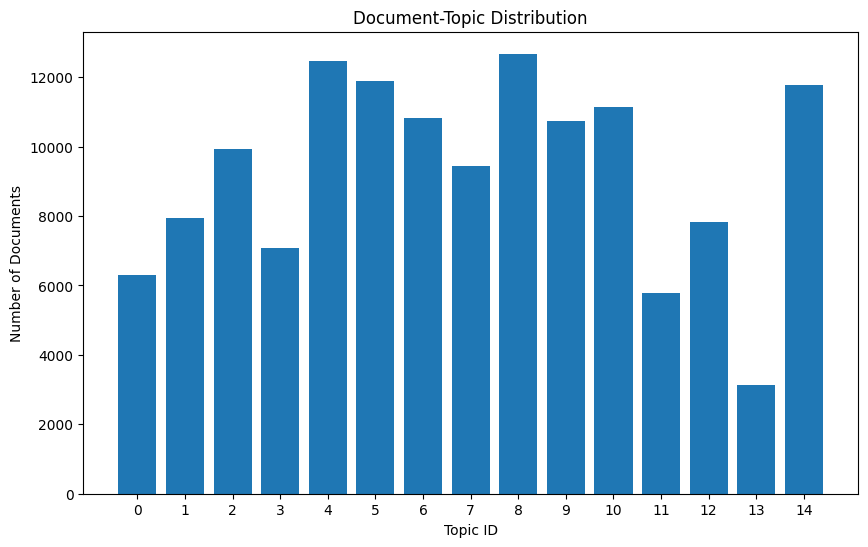

In [23]:
# Visualize document-topic distribution using a bar chart
def visualize_doc_topic_distribution(doc_topic_dist):
    # Initialize an array to store topic counts
    topic_counts = np.zeros(nmf_model.num_topics)

    # Count occurrences of each topic for all documents
    for doc_topic_probs in doc_topic_dist:
        for topic_id, _ in doc_topic_probs:
            topic_counts[topic_id] += 1

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(range(nmf_model.num_topics), topic_counts)
    plt.xlabel('Topic ID')
    plt.ylabel('Number of Documents')
    plt.title('Document-Topic Distribution')
    plt.xticks(range(nmf_model.num_topics))
    plt.show()

# Example: Visualize the document-topic distribution
visualize_doc_topic_distribution(doc_topic_dist)

In [24]:
# Identify dominant topics for each document
def identify_dominant_topics(doc_topic_dist):
    dominant_topics = []
    for doc_dist in doc_topic_dist:
        dominant_topic = max(doc_dist, key=lambda x: x[1])
        dominant_topics.append(dominant_topic)
    return dominant_topics

# Identify dominant topics for each document
dominant_topics = identify_dominant_topics(doc_topic_dist)
print("Dominant Topics for Each Document:")
for doc_id, dominant_topic in enumerate(dominant_topics):
    print(f"Document {doc_id}: Dominant Topic {dominant_topic[0]} with Probability {dominant_topic[1]:.4f}")


Streaming output truncated to the last 5000 lines.
Document 15972: Dominant Topic 9 with Probability 0.4061
Document 15973: Dominant Topic 11 with Probability 0.2588
Document 15974: Dominant Topic 12 with Probability 0.1872
Document 15975: Dominant Topic 8 with Probability 0.3767
Document 15976: Dominant Topic 7 with Probability 0.3576
Document 15977: Dominant Topic 12 with Probability 0.5034
Document 15978: Dominant Topic 0 with Probability 0.5144
Document 15979: Dominant Topic 14 with Probability 0.7912
Document 15980: Dominant Topic 13 with Probability 0.4787
Document 15981: Dominant Topic 4 with Probability 0.3231
Document 15982: Dominant Topic 14 with Probability 0.3224
Document 15983: Dominant Topic 0 with Probability 0.9581
Document 15984: Dominant Topic 6 with Probability 0.4147
Document 15985: Dominant Topic 14 with Probability 0.9659
Document 15986: Dominant Topic 11 with Probability 0.4797
Document 15987: Dominant Topic 2 with Probability 0.3117
Document 15988: Dominant Topi

In [25]:
# Calculate the average probability of each topic across all documents
def calculate_avg_topic_probability(doc_topic_dist):
    num_documents = len(doc_topic_dist)
    avg_topic_probabilities = np.zeros(nmf_model.num_topics)

    # Sum the probabilities for each topic across all documents
    for doc_topic_probs in doc_topic_dist:
        for topic_id, topic_prob in doc_topic_probs:
            avg_topic_probabilities[topic_id] += topic_prob

    # Calculate the average probability for each topic
    avg_topic_probabilities /= num_documents
    return avg_topic_probabilities

# Calculate the average topic probability
avg_topic_probabilities = calculate_avg_topic_probability(doc_topic_dist)

for topic_id, avg_prob in enumerate(avg_topic_probabilities):
    print(f"Topic {topic_id}: Average Probability {avg_prob:.4f}")


Topic 0: Average Probability 0.0363
Topic 1: Average Probability 0.0553
Topic 2: Average Probability 0.0515
Topic 3: Average Probability 0.0388
Topic 4: Average Probability 0.1149
Topic 5: Average Probability 0.0901
Topic 6: Average Probability 0.0734
Topic 7: Average Probability 0.0615
Topic 8: Average Probability 0.1038
Topic 9: Average Probability 0.0706
Topic 10: Average Probability 0.0678
Topic 11: Average Probability 0.0393
Topic 12: Average Probability 0.0536
Topic 13: Average Probability 0.0139
Topic 14: Average Probability 0.1236


### Topic Labeling

In [30]:
# Assign meaningful labels to topics based on representative words or documents
def label_topics(nmf_model, num_words=10, min_word_length=2):
    topic_labels = []
    for topic_id in range(nmf_model.num_topics):
        top_words = nmf_model.show_topic(topic_id, topn=num_words)
        filtered_words = [word for word, _ in top_words if len(word) > min_word_length]
        topic_labels.append(f"Topic {topic_id}: {' | '.join(filtered_words)}")
    return topic_labels

topic_labels = label_topics(nmf_model, num_words=10, min_word_length=2)

for label in topic_labels:
    print(label)

Topic 0: number
Topic 1: model | propose | parameters | process | inference | train | show | bayesian | prediction | two
Topic 2: function | approach | process | propose | optimization | paper | base | new | result | show
Topic 3: data | analysis | set | train | process | methods | provide | approach | information | cluster
Topic 4: system | systems | use | control | design | paper | present | provide | performance | process
Topic 5: group | result | study | show | also | prove | case | space | give
Topic 6: time | structure | find | two | process | series | scale | star | study | mass
Topic 7: sample | distribution | cluster | star | mass | find | galaxies | estimate | show | test
Topic 8: set | problem | give | show | space | point | condition | consider | problems | case
Topic 9: method | image | propose | methods | base | result | use | paper | test | new
Topic 10: use | approach | feature | learn | present | base | train | show | different | methods
Topic 11: network | neural | tr

### Topic Similarity

In [31]:
# Calculate topic similarity using cosine similarity
def calculate_topic_similarity(nmf_model):
    topic_vectors = nmf_model.get_topics()
    similarity_matrix = cosine_similarity(topic_vectors)
    return similarity_matrix

# Example: Calculate topic similarity for NMF model
topic_similarity_matrix = calculate_topic_similarity(nmf_model)

# Print the similarity matrix
print("Topic Similarity Matrix:")
print(topic_similarity_matrix)


Topic Similarity Matrix:
[[1.         0.01197834 0.08459861 0.01164454 0.04415404 0.15693529
  0.06685285 0.07450697 0.17288751 0.04096834 0.03137537 0.01847068
  0.05338126 0.08140576 0.07448944]
 [0.01197834 1.         0.05536859 0.02894906 0.07761522 0.05352995
  0.0506244  0.05777821 0.04885683 0.06902577 0.05550763 0.03499269
  0.06642411 0.01707498 0.04996403]
 [0.08459861 0.05536859 1.         0.05825421 0.16477106 0.16349596
  0.10163887 0.12043576 0.18704782 0.1808426  0.09943149 0.05280929
  0.12584061 0.04770148 0.09660801]
 [0.01164454 0.02894906 0.05825421 1.         0.10442014 0.05249843
  0.05270208 0.09191068 0.06779029 0.08277684 0.0679192  0.03837631
  0.06221648 0.02248952 0.03857645]
 [0.04415404 0.07761522 0.16477106 0.10442014 1.         0.19508965
  0.17804351 0.14631429 0.14444763 0.22287325 0.30795899 0.10105105
  0.15789357 0.06628478 0.18598608]
 [0.15693529 0.05352995 0.16349596 0.05249843 0.19508965 1.
  0.17241154 0.16403322 0.29344069 0.15131028 0.0668196

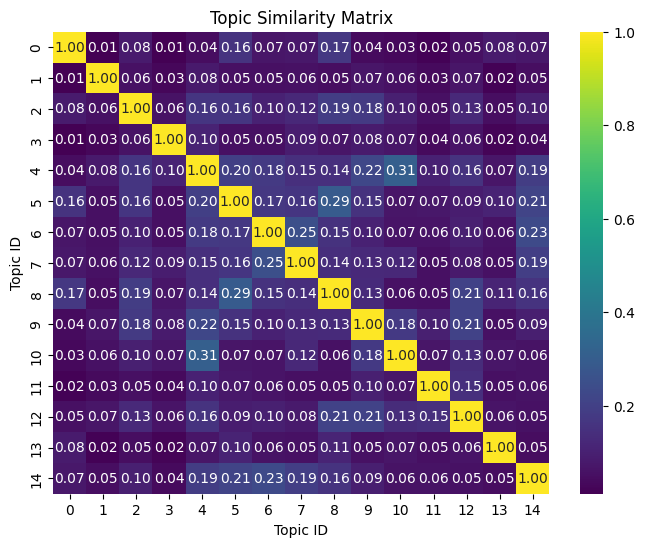

In [32]:
# Visualize topic similarity matrix as a heatmap
def visualize_topic_similarity(topic_similarity_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(topic_similarity_matrix, cmap="viridis", annot=True, fmt=".2f", xticklabels=range(len(topic_similarity_matrix)), yticklabels=range(len(topic_similarity_matrix)))
    plt.xlabel("Topic ID")
    plt.ylabel("Topic ID")
    plt.title("Topic Similarity Matrix")
    plt.show()

# Visualize topic similarity matrix for NMF model
visualize_topic_similarity(topic_similarity_matrix)
